In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences


In [15]:
# Load IMDB dataset
num_words = 25000  # Limit to the top 25000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

In [20]:
# Pad sequences to a maximum length of 100 (truncate longer sequences and pad shorter sequences)
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [21]:
# Define the neural network architecture
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           800000    
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                102432    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 902465 (3.44 MB)
Trainable params: 902465 (3.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 6s 29ms/step - loss: 0.5088 - accuracy: 0.7319 - val_loss: 0.3397 - val_accuracy: 0.8496
Epoch 2/10
196/196 [==============================] - 4s 20ms/step - loss: 0.1923 - accuracy: 0.9276 - val_loss: 0.3614 - val_accuracy: 0.8450
Epoch 3/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0462 - accuracy: 0.9905 - val_loss: 0.4205 - val_accuracy: 0.8401
Epoch 4/10
196/196 [==============================] - 5s 27ms/step - loss: 0.0087 - accuracy: 0.9994 - val_loss: 0.4605 - val_accuracy: 0.8412
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4928 - val_accuracy: 0.8424
Epoch 6/10
196/196 [==============================] - 4s 19ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5167 - val_accuracy: 0.8422
Epoch 7/10
196/196 [==============================] - 5s 27ms/step - loss: 9.3892e-04 - accuracy: 1.0000 - val_loss: 0.5365 - val_accuracy: 0.

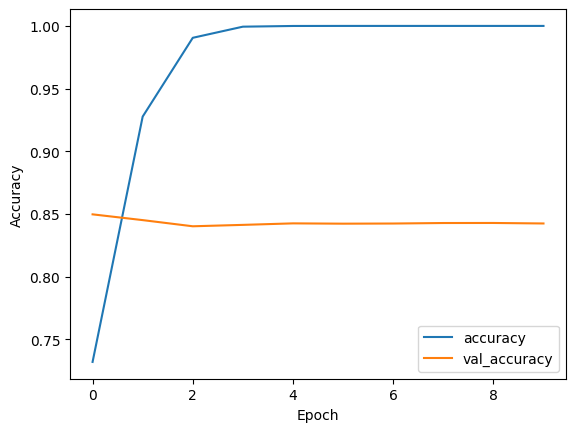

In [25]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100}')

782/782 [==============================] - 2s 2ms/step - loss: 0.5821 - accuracy: 0.8424
Test accuracy: 84.23600196838379
